In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Useful Functions

In [4]:
def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def Softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))

  Y = np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]]=1
  return Y 

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

In [5]:
class Shallow_ANN():

  def fit(self,  X, y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):  #neurons is number of activations Z
    epochs = int(epochs)
    Y = one_hot_encode(y)

    N,D = X.shape  # D is the number of inputs
    K = Y.shape[1]  # K is the number of outputs

    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D, neurons], [neurons, K]), 1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}

    self.a = {1: np.tanh, 2:softmax}

    J = np.zeros(epochs)

    for epoch in range(epochs):

      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      # Weight Update Rule:

      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2] - Y)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2] - Y)@self.W[2].T*(1 - self.Z[1]**2))

      # Bias update rule:
      self.b[2] -= eta*(1/N)*(self.Z[2] - Y).sum(axis=0)
      self.b[1] -= eta*(1/N)*((self.Z[2] - Y)@self.W[2].T*(1 - self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')

  def __forward__(self, X):
    self.Z = {0:X}
      
    for l in sorted (self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])  #self.a is the activation for what is in the parentheses

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

## Importing the data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/Cirrhosis - Cirrhosis.csv')
data = data.drop('index', axis=1)
data

,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       312 non-null    int64  
 1   status         312 non-null    int64  
 2   drug           312 non-null    int64  
 3   age            312 non-null    int64  
 4   sex            312 non-null    int64  
 5   ascites        312 non-null    int64  
 6   hepatomology   312 non-null    int64  
 7   spiders        312 non-null    int64  
 8   edema          312 non-null    float64
 9   bilirubin      312 non-null    float64
 10  cholesterol    284 non-null    float64
 11  albumin        312 non-null    float64
 12  copper         310 non-null    float64
 13  phosphatase    312 non-null    float64
 14  SGOT           312 non-null    float64
 15  triglicerides  282 non-null    float64
 16  platelets      308 non-null    float64
 17  prothrombin    312 non-null    float64
 18  stage     

In [8]:
data.columns = ['Duration', 'Status', 'Drug', 'Age', 'Gender', 'Ascites', 'Hepatomology', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',\
                'Phosphate', 'SGOT', 'Triglicerides', 'Platelets', 'Prothrombin', 'Stage']
data

,Duration,Status,Drug,Age,Gender,Ascites,Hepatomology,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Phosphate,SGOT,Triglicerides,Platelets,Prothrombin,Stage
0,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [9]:
data.describe()

,Duration,Status,Drug,Age,Gender,Ascites,Hepatomology,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Phosphate,SGOT,Triglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,2006.362179,0.862179,1.493590,18269.442308,0.884615,0.076923,0.512821,0.288462,0.110577,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.274507,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1191.000000,0.000000,1.000000,15427.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,1839.500000,0.000000,1.000000,18187.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,2697.250000,2.000000,2.000000,20715.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,4556.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [10]:
data.dtypes

Duration           int64
Status             int64
Drug               int64
Age                int64
Gender             int64
Ascites            int64
Hepatomology       int64
Spiders            int64
Edema            float64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Phosphate        float64
SGOT             float64
Triglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(312, 19)

## EDA

In [13]:
data['Age'] = (data['Age']//365)
data

,Duration,Status,Drug,Age,Gender,Ascites,Hepatomology,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Phosphate,SGOT,Triglicerides,Platelets,Prothrombin,Stage
0,400,2,1,58,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,0,1,56,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,2,1,70,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,2,1,54,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,1,2,38,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,1,61,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,0,2,58,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,0,1,62,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,0,1,38,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e66706b50>,
      dtype=object)

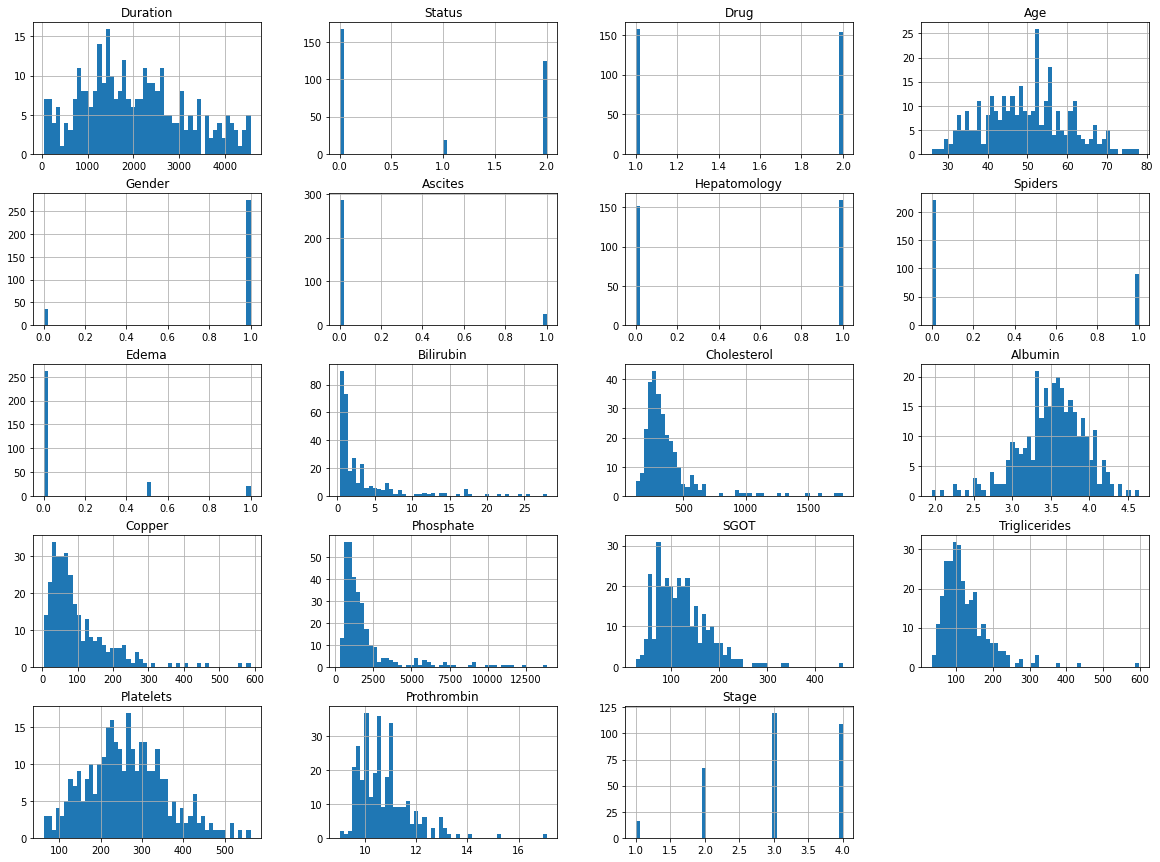

In [14]:
data.hist(bins=50, figsize=(20, 15))

In [15]:
data.isnull().sum()

Duration          0
Status            0
Drug              0
Age               0
Gender            0
Ascites           0
Hepatomology      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Phosphate         0
SGOT              0
Triglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [16]:
columns = data.select_dtypes(['int64', 'float64'])

for column in columns.columns:
  data[column].fillna(data[column].median(), inplace=True)

In [17]:
data.isnull().sum()

Duration         0
Status           0
Drug             0
Age              0
Gender           0
Ascites          0
Hepatomology     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Phosphate        0
SGOT             0
Triglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [18]:
data.dtypes

Duration           int64
Status             int64
Drug               int64
Age                int64
Gender             int64
Ascites            int64
Hepatomology       int64
Spiders            int64
Edema            float64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Phosphate        float64
SGOT             float64
Triglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

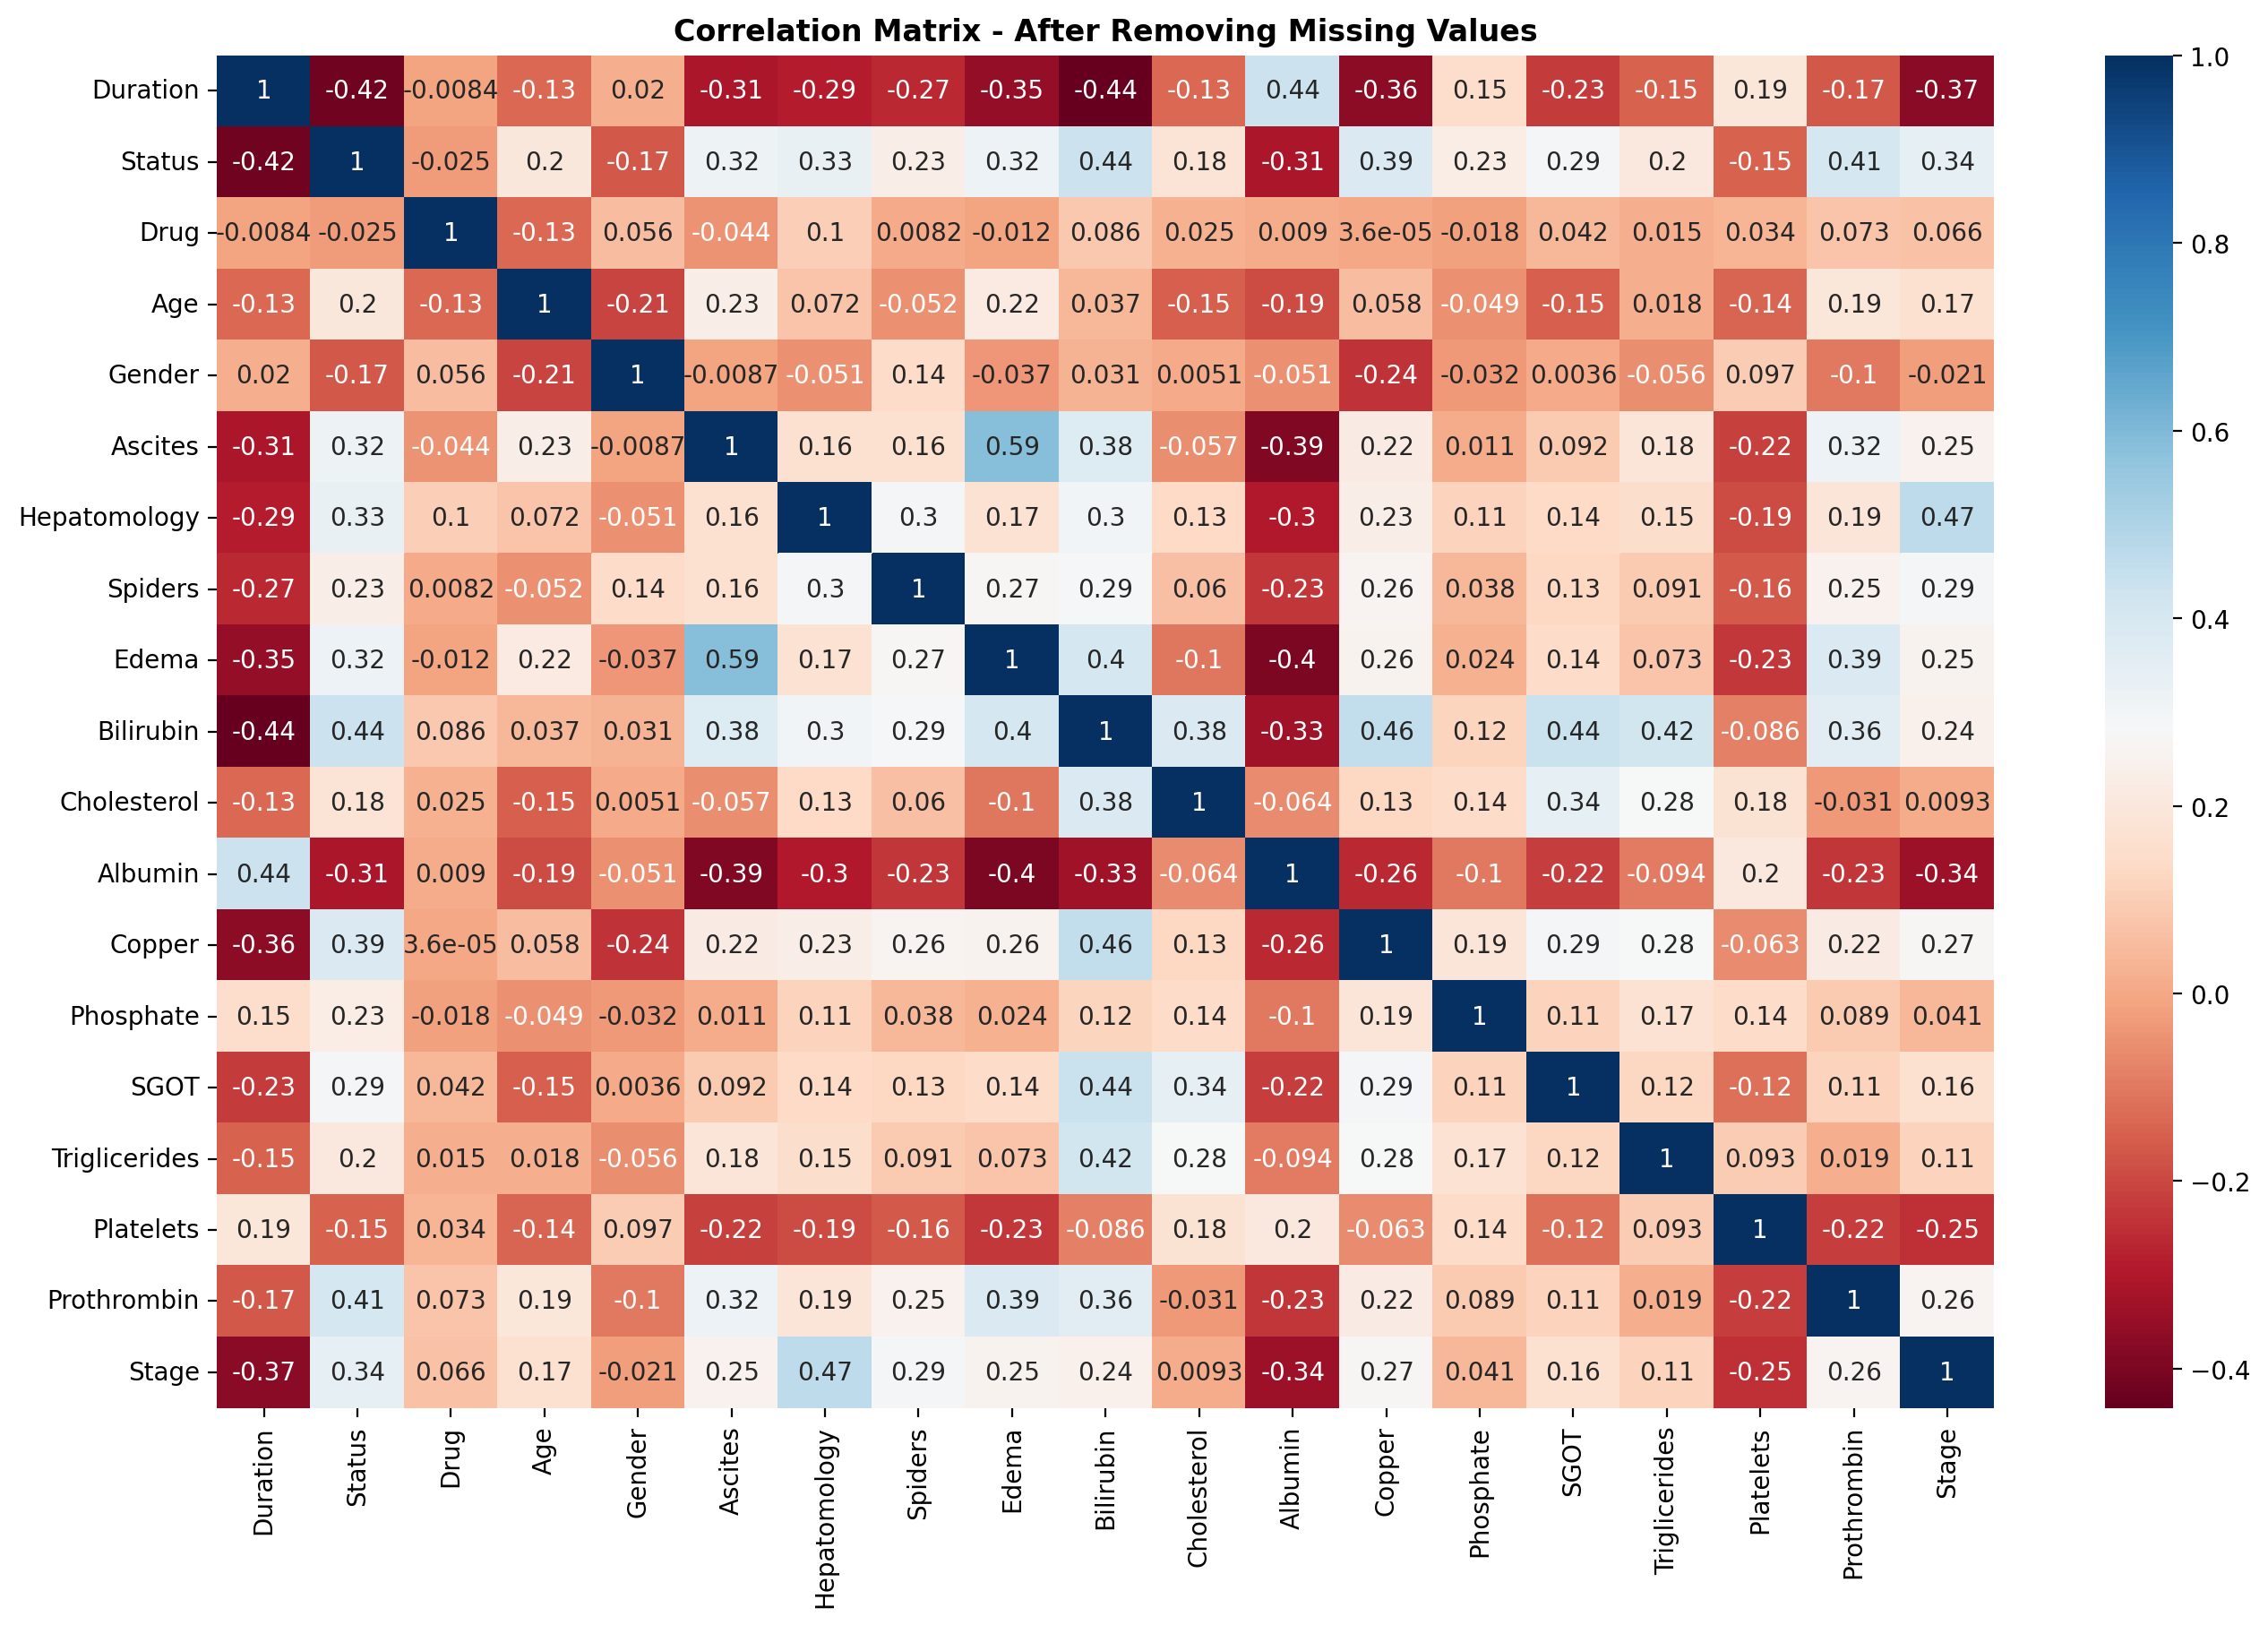

In [19]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(data.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - After Removing Missing Values', weight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

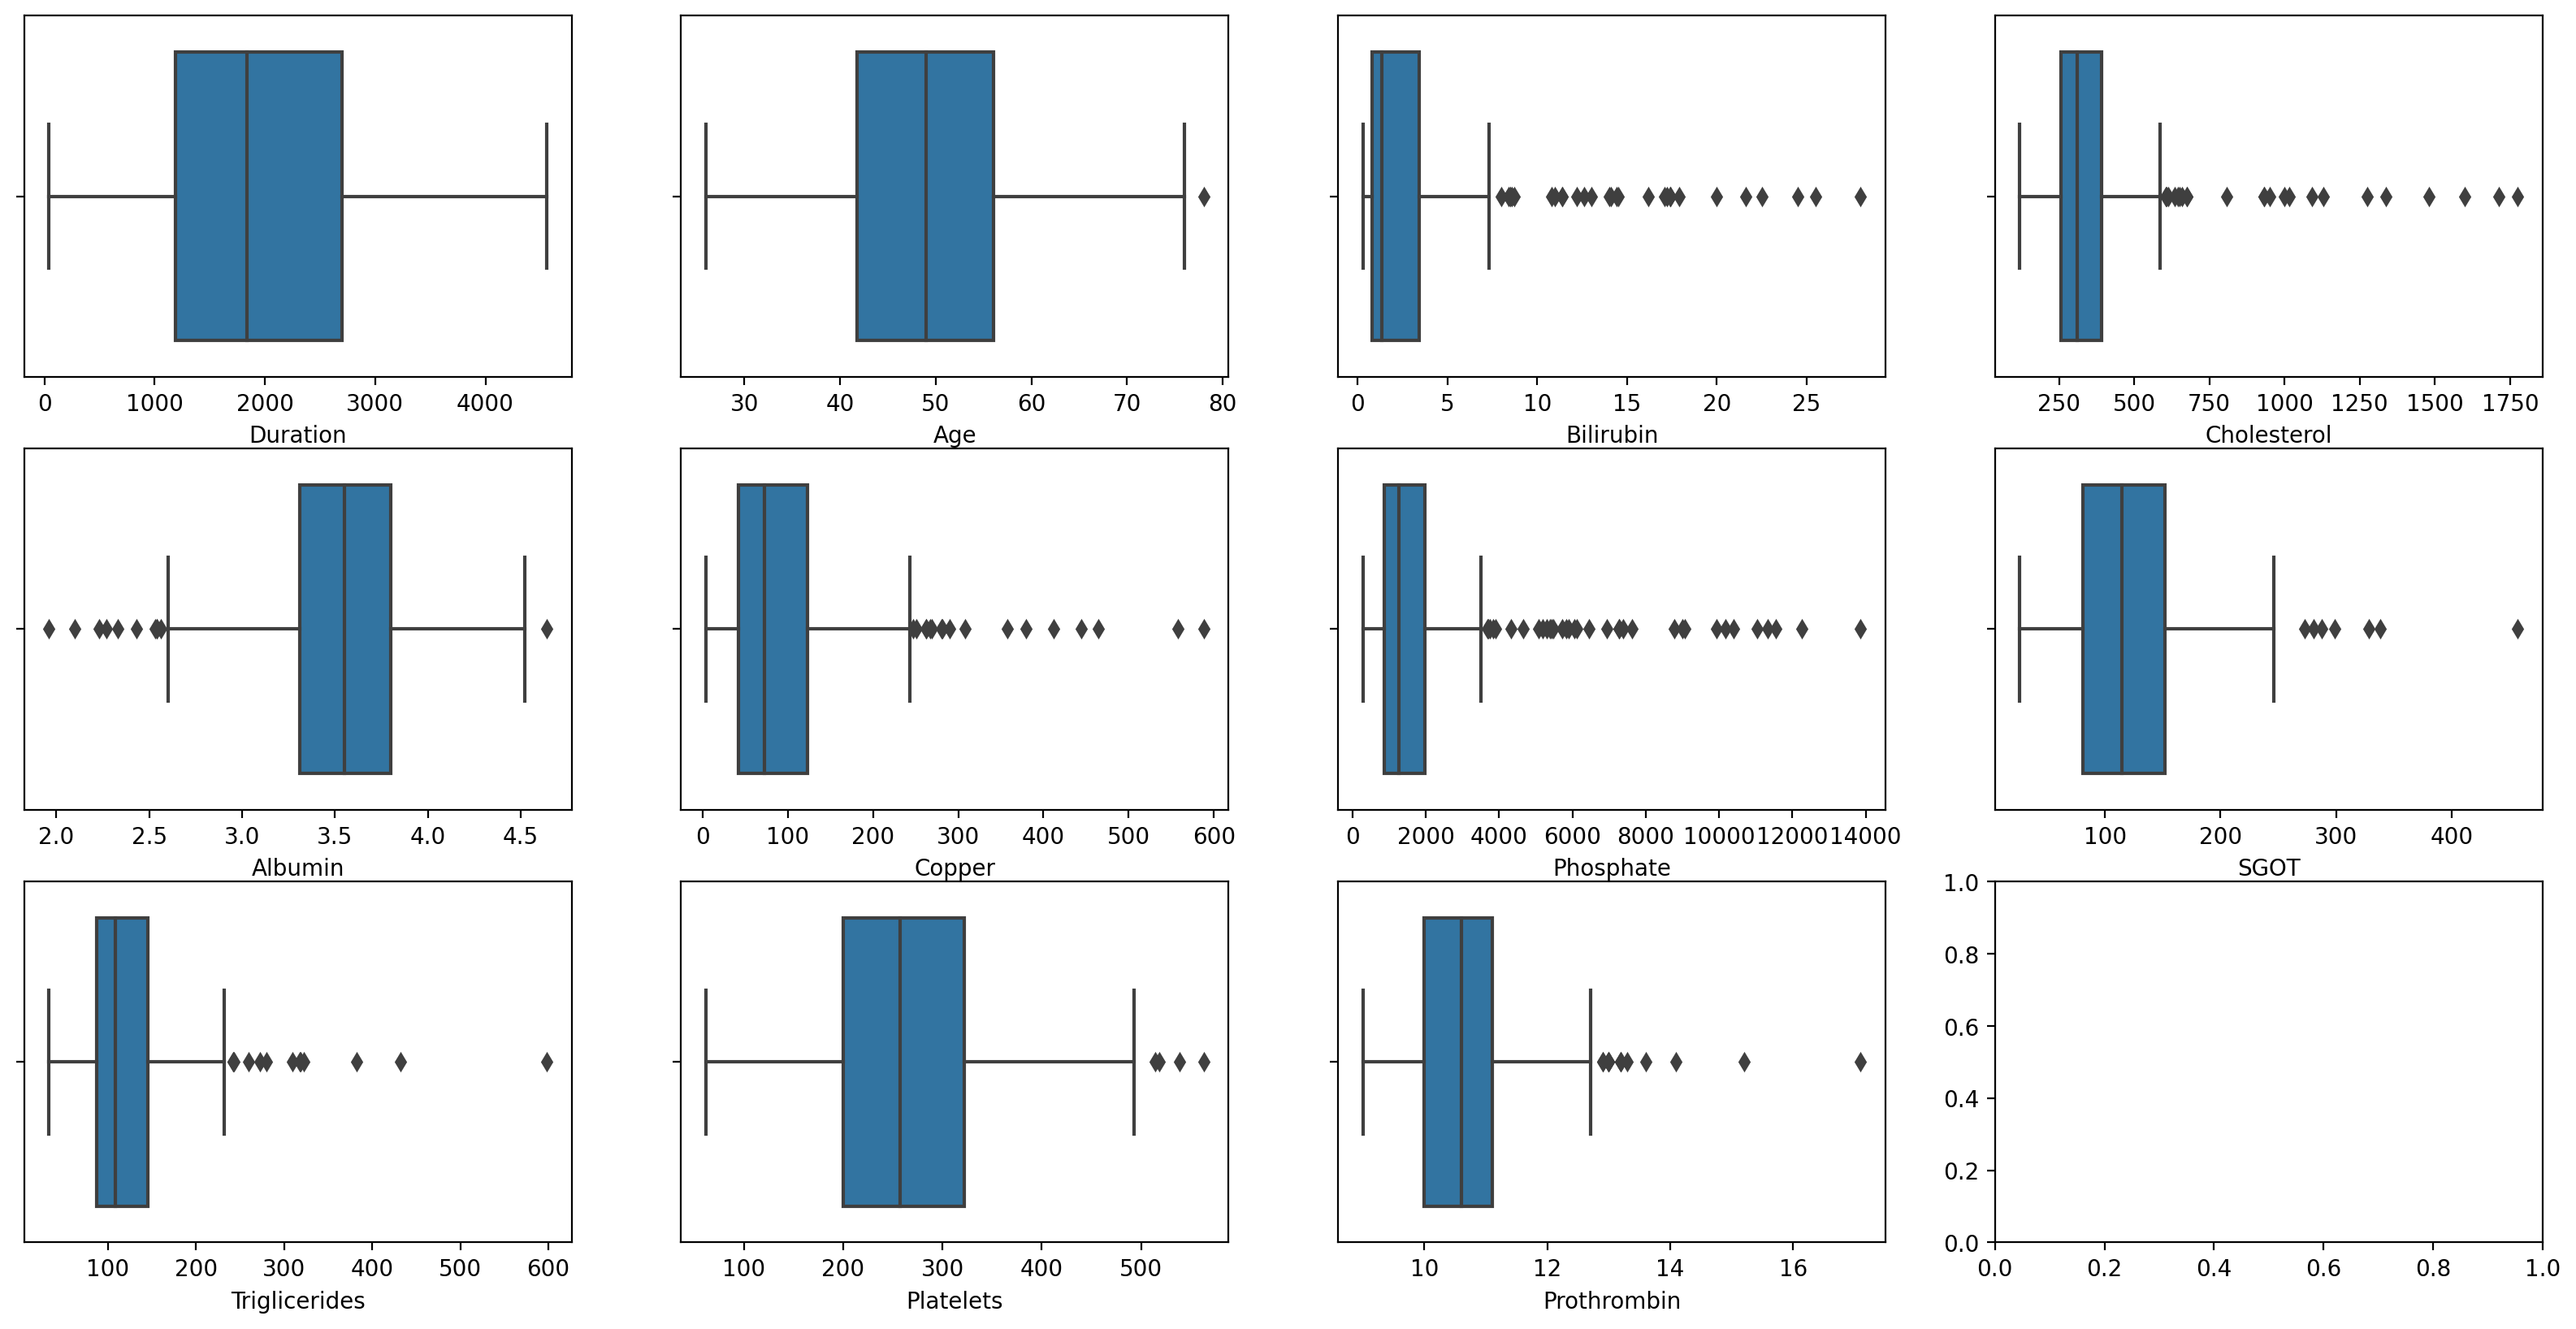

In [20]:
fig,axes=plt.subplots(3,4,figsize=(20,10), dpi=200)

sns.boxplot(data['Duration'],ax=axes[0,0])
sns.boxplot(data['Age'],ax=axes[0,1])
sns.boxplot(data['Bilirubin'],ax=axes[0,2])
sns.boxplot(data['Cholesterol'],ax=axes[0,3])
sns.boxplot(data['Albumin'],ax=axes[1,0])
sns.boxplot(data['Copper'],ax=axes[1,1])
sns.boxplot(data['Phosphate'],ax=axes[1,2])
sns.boxplot(data['SGOT'],ax=axes[1,3])
sns.boxplot(data['Triglicerides'],ax=axes[2,0])
sns.boxplot(data['Platelets'],ax=axes[2,1])
sns.boxplot(data['Prothrombin'],ax=axes[2,2])


In [21]:
data = data.drop(data[data['Bilirubin'].values > 8].index)
data = data.drop(data[data['Cholesterol'].values > 750].index)
data = data.drop(data[data['Phosphate'].values > 5000].index)
data = data.drop(data[data['Triglicerides'].values > 300].index)
data = data.drop(data[data['Copper'].values > 300].index)


In [22]:
data.shape

(243, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

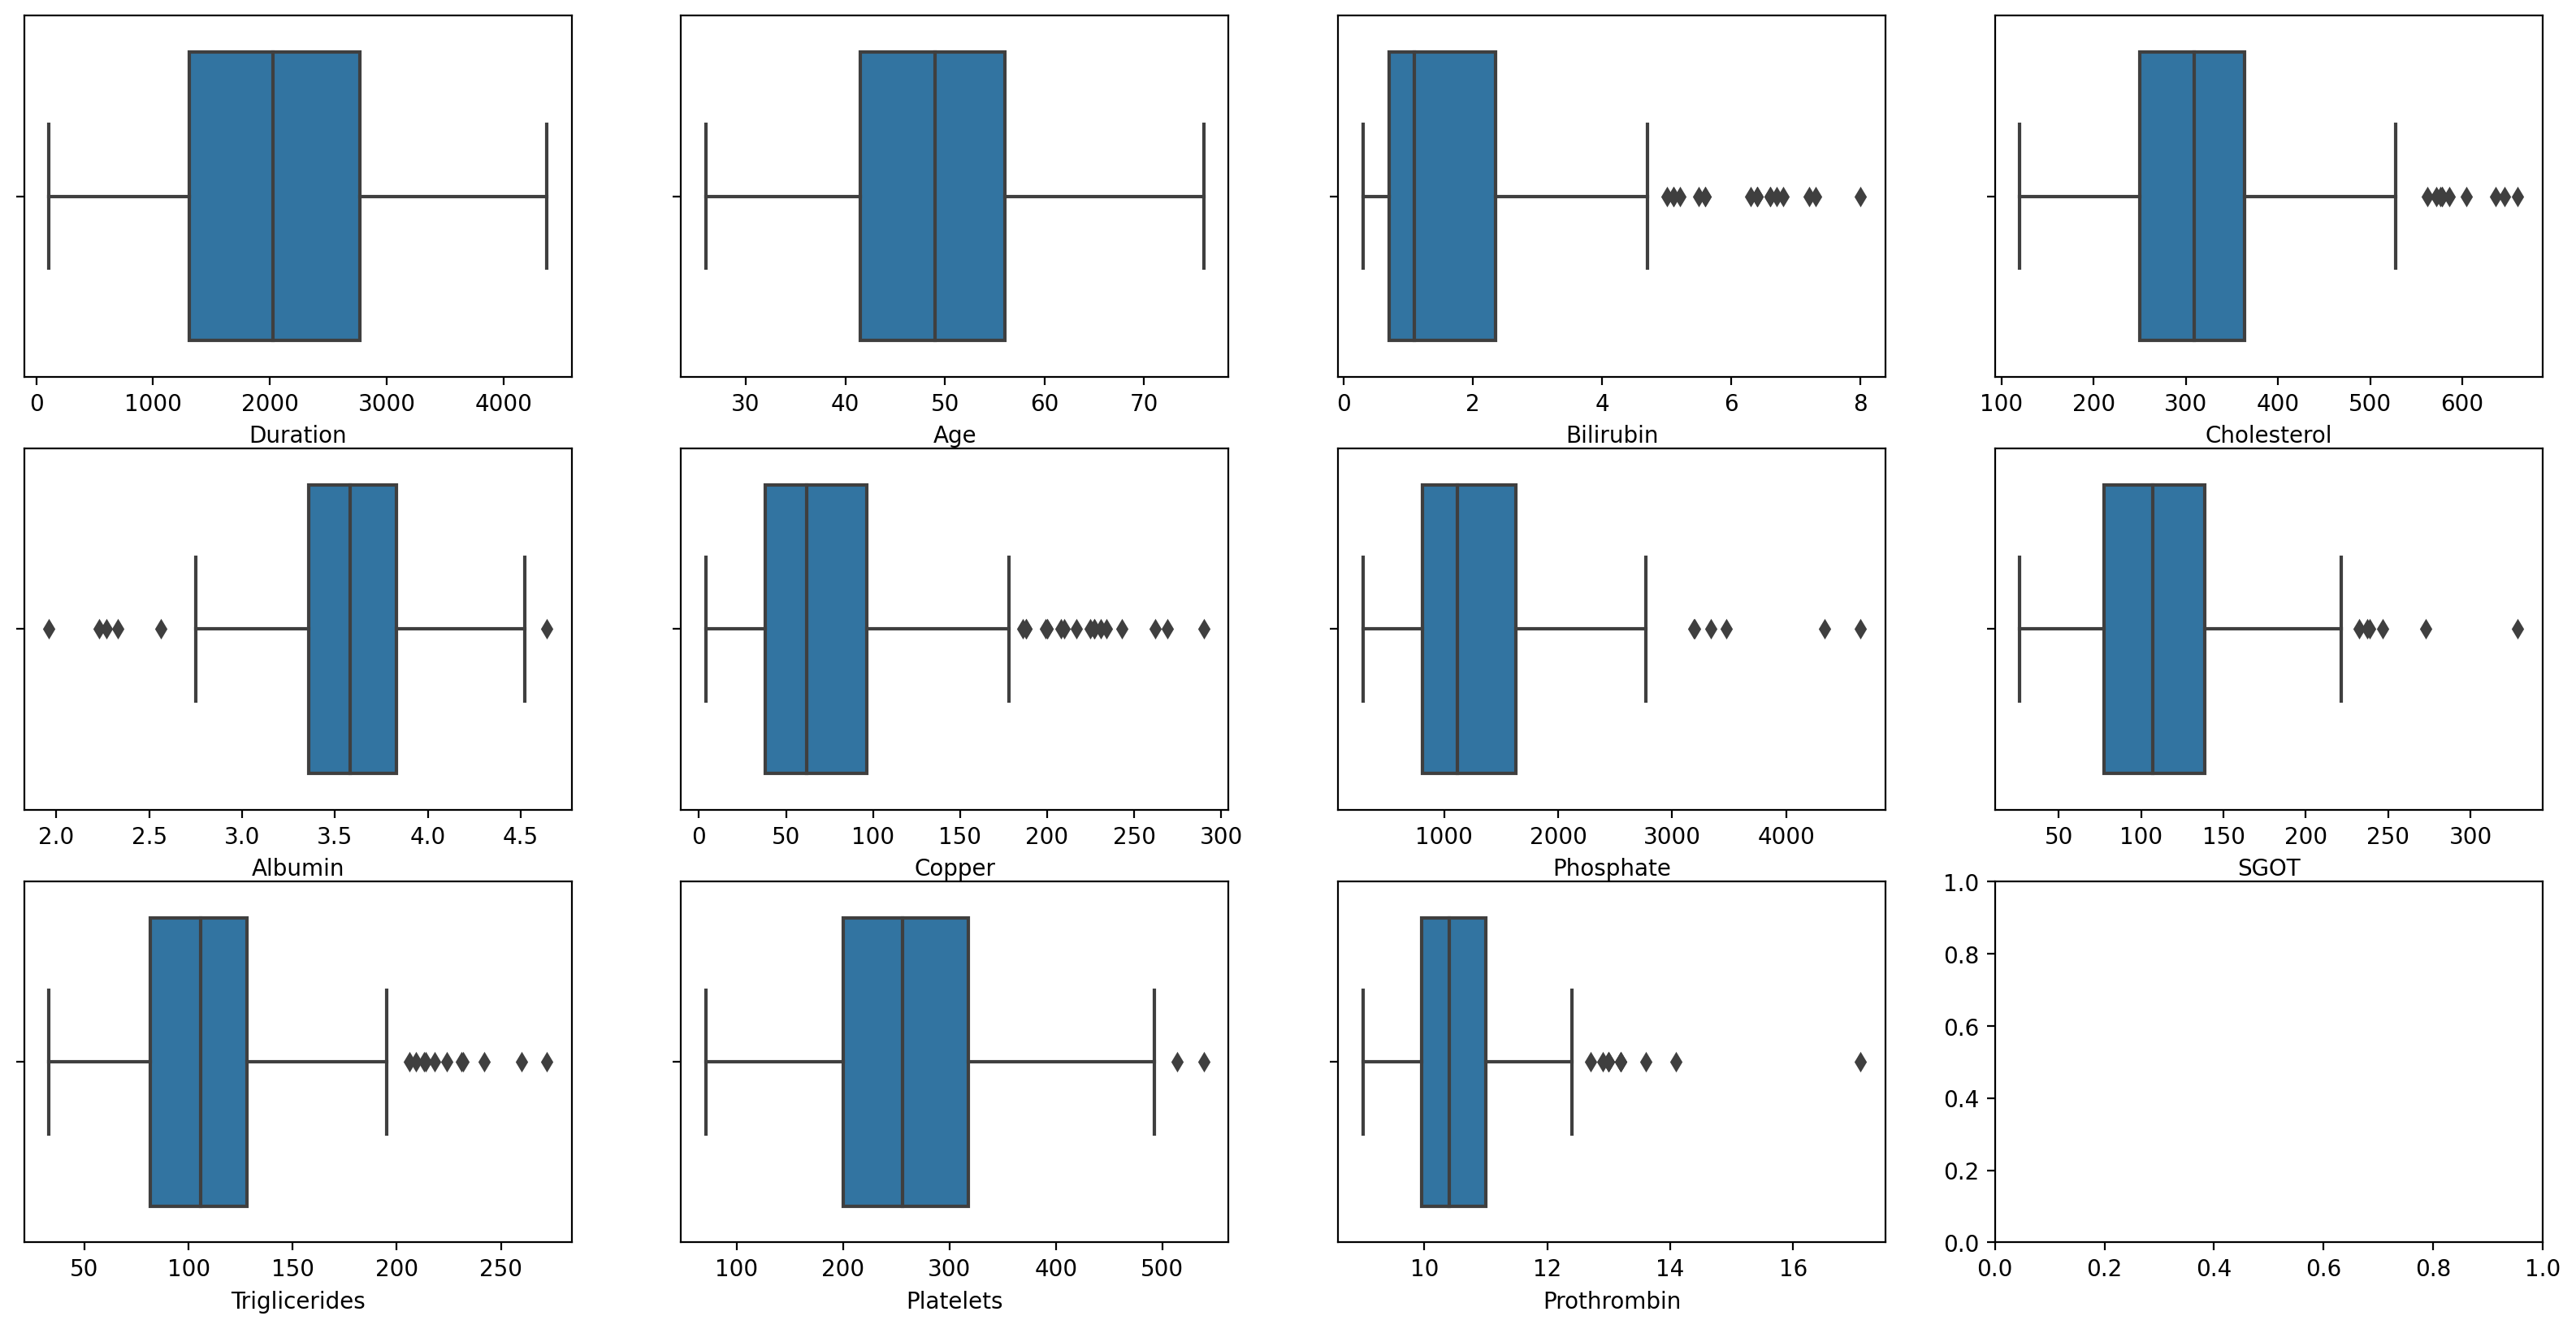

In [23]:
fig,axes=plt.subplots(3,4,figsize=(20,10), dpi=200)

sns.boxplot(data['Duration'],ax=axes[0,0])
sns.boxplot(data['Age'],ax=axes[0,1])
sns.boxplot(data['Bilirubin'],ax=axes[0,2])
sns.boxplot(data['Cholesterol'],ax=axes[0,3])
sns.boxplot(data['Albumin'],ax=axes[1,0])
sns.boxplot(data['Copper'],ax=axes[1,1])
sns.boxplot(data['Phosphate'],ax=axes[1,2])
sns.boxplot(data['SGOT'],ax=axes[1,3])
sns.boxplot(data['Triglicerides'],ax=axes[2,0])
sns.boxplot(data['Platelets'],ax=axes[2,1])
sns.boxplot(data['Prothrombin'],ax=axes[2,2])

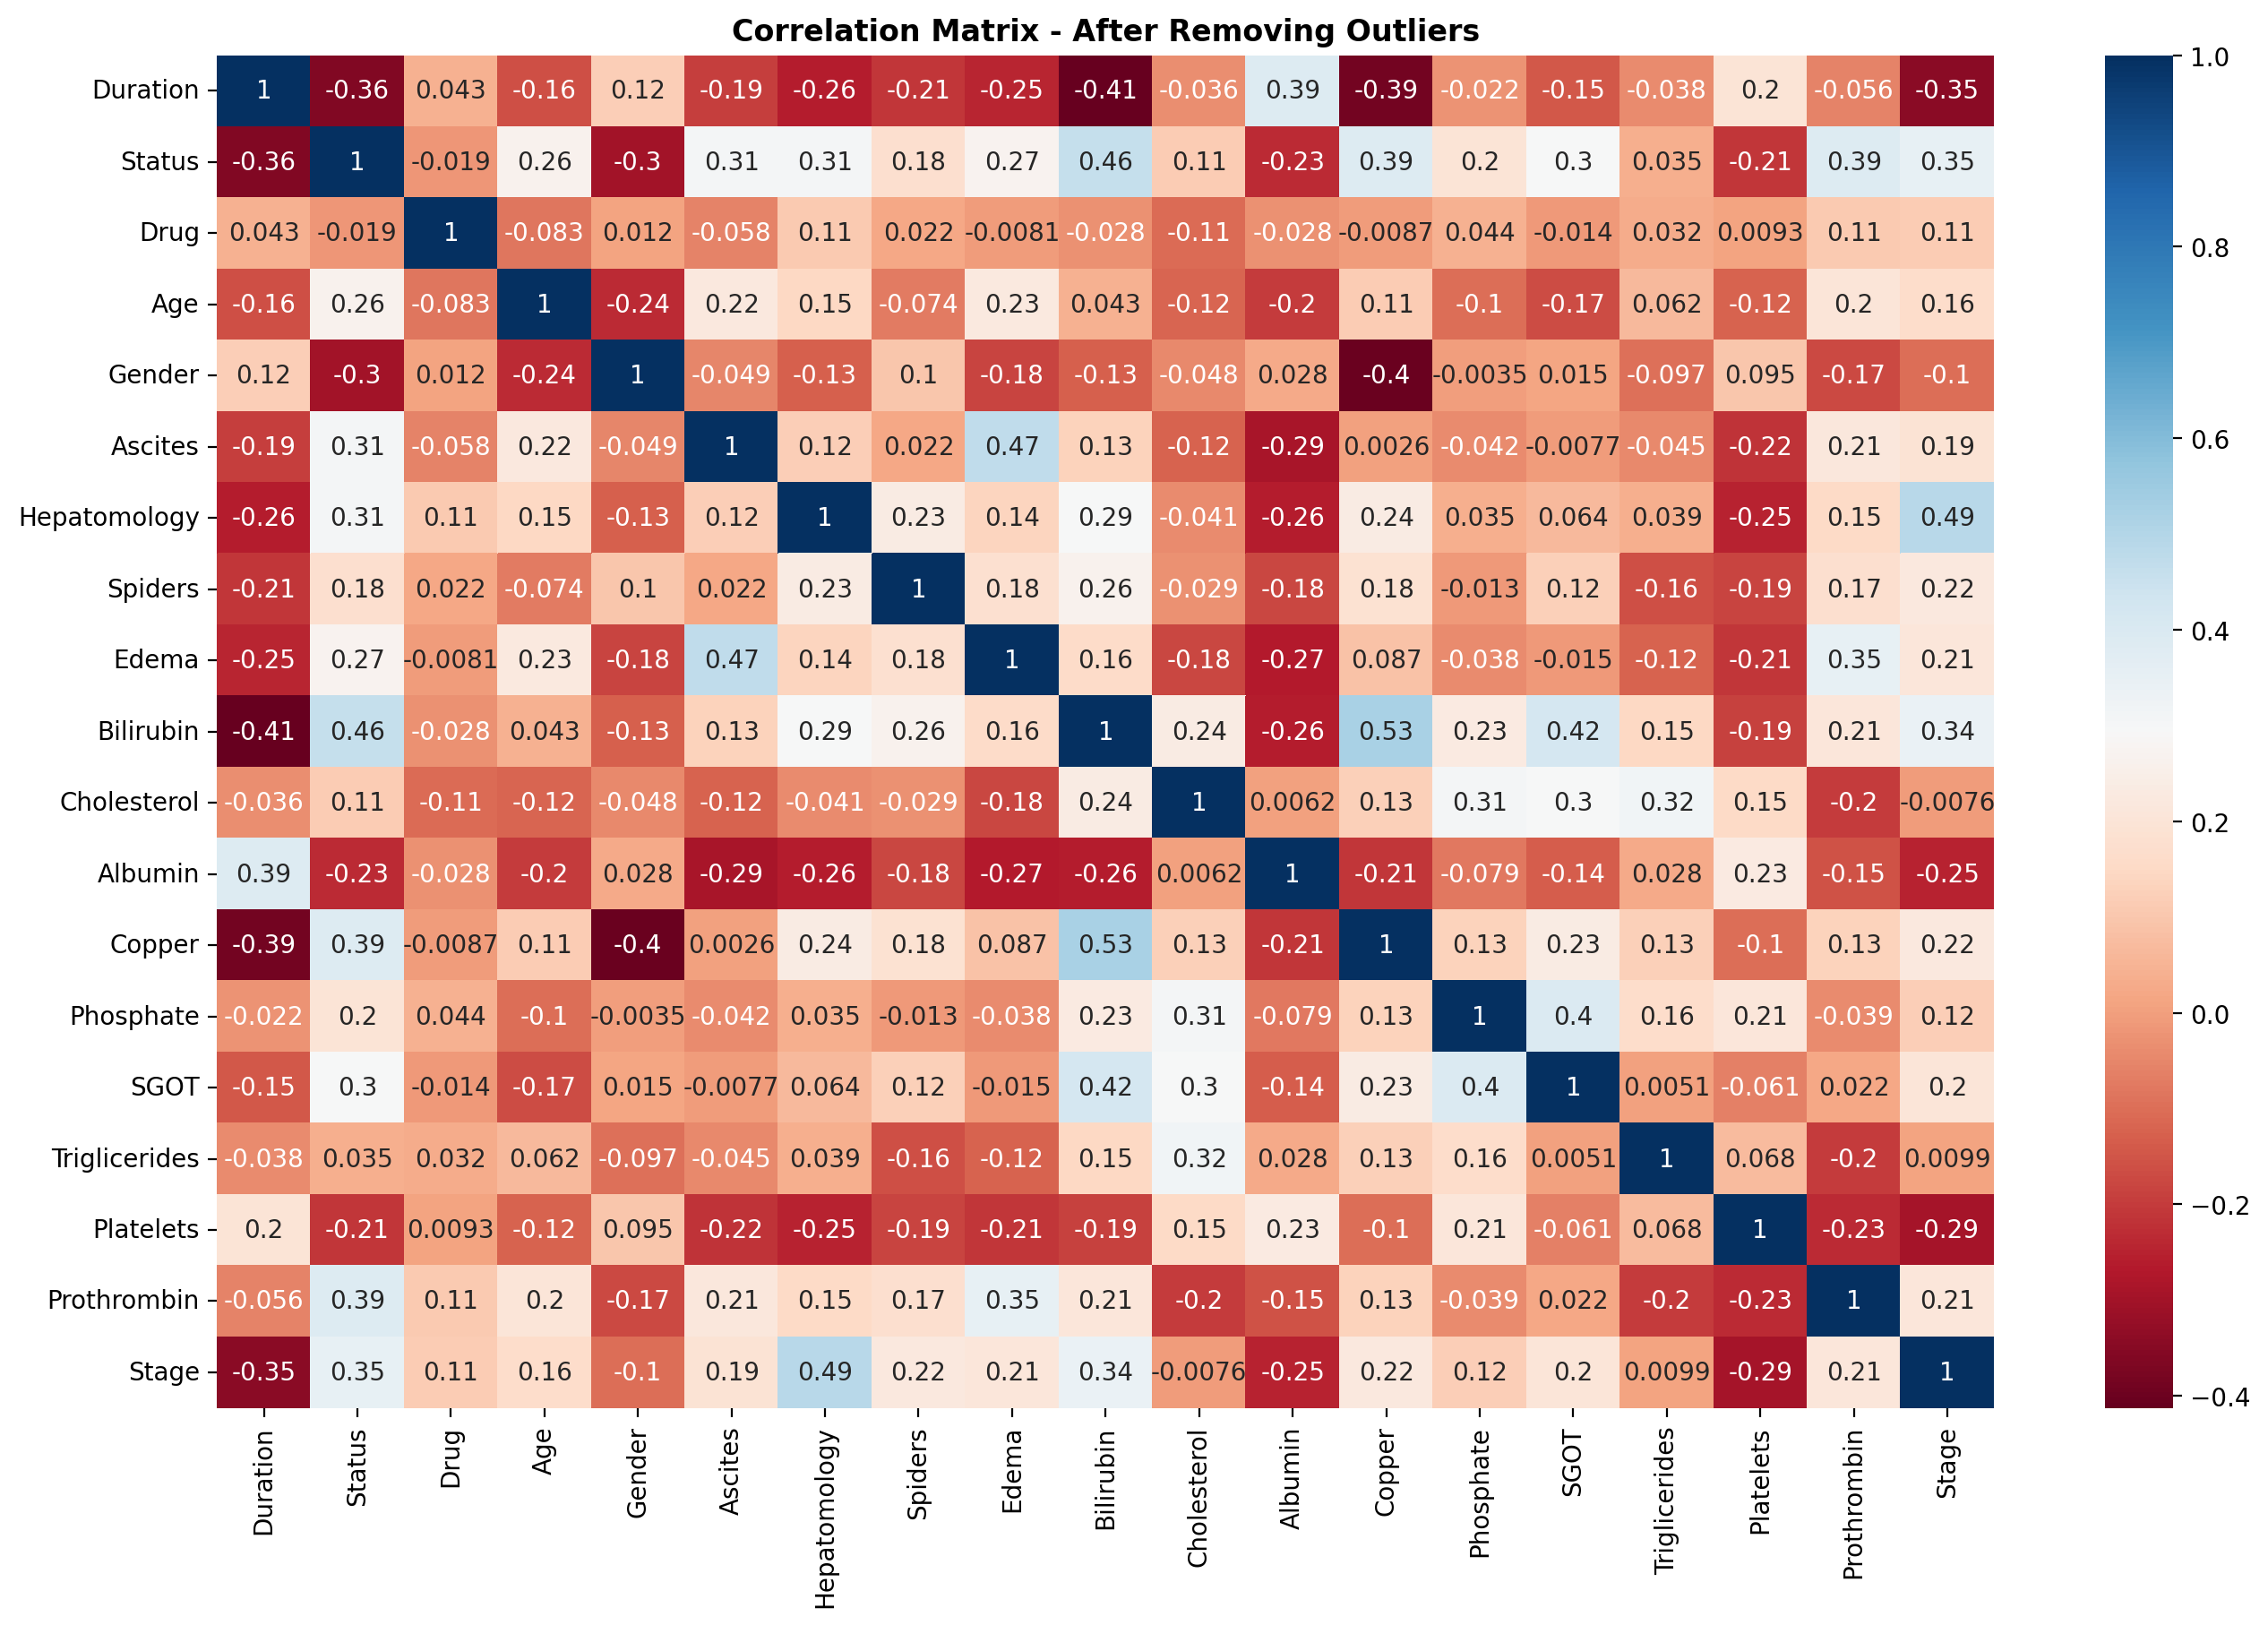

In [24]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(data.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - After Removing Outliers', weight='bold')
plt.show()

## Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

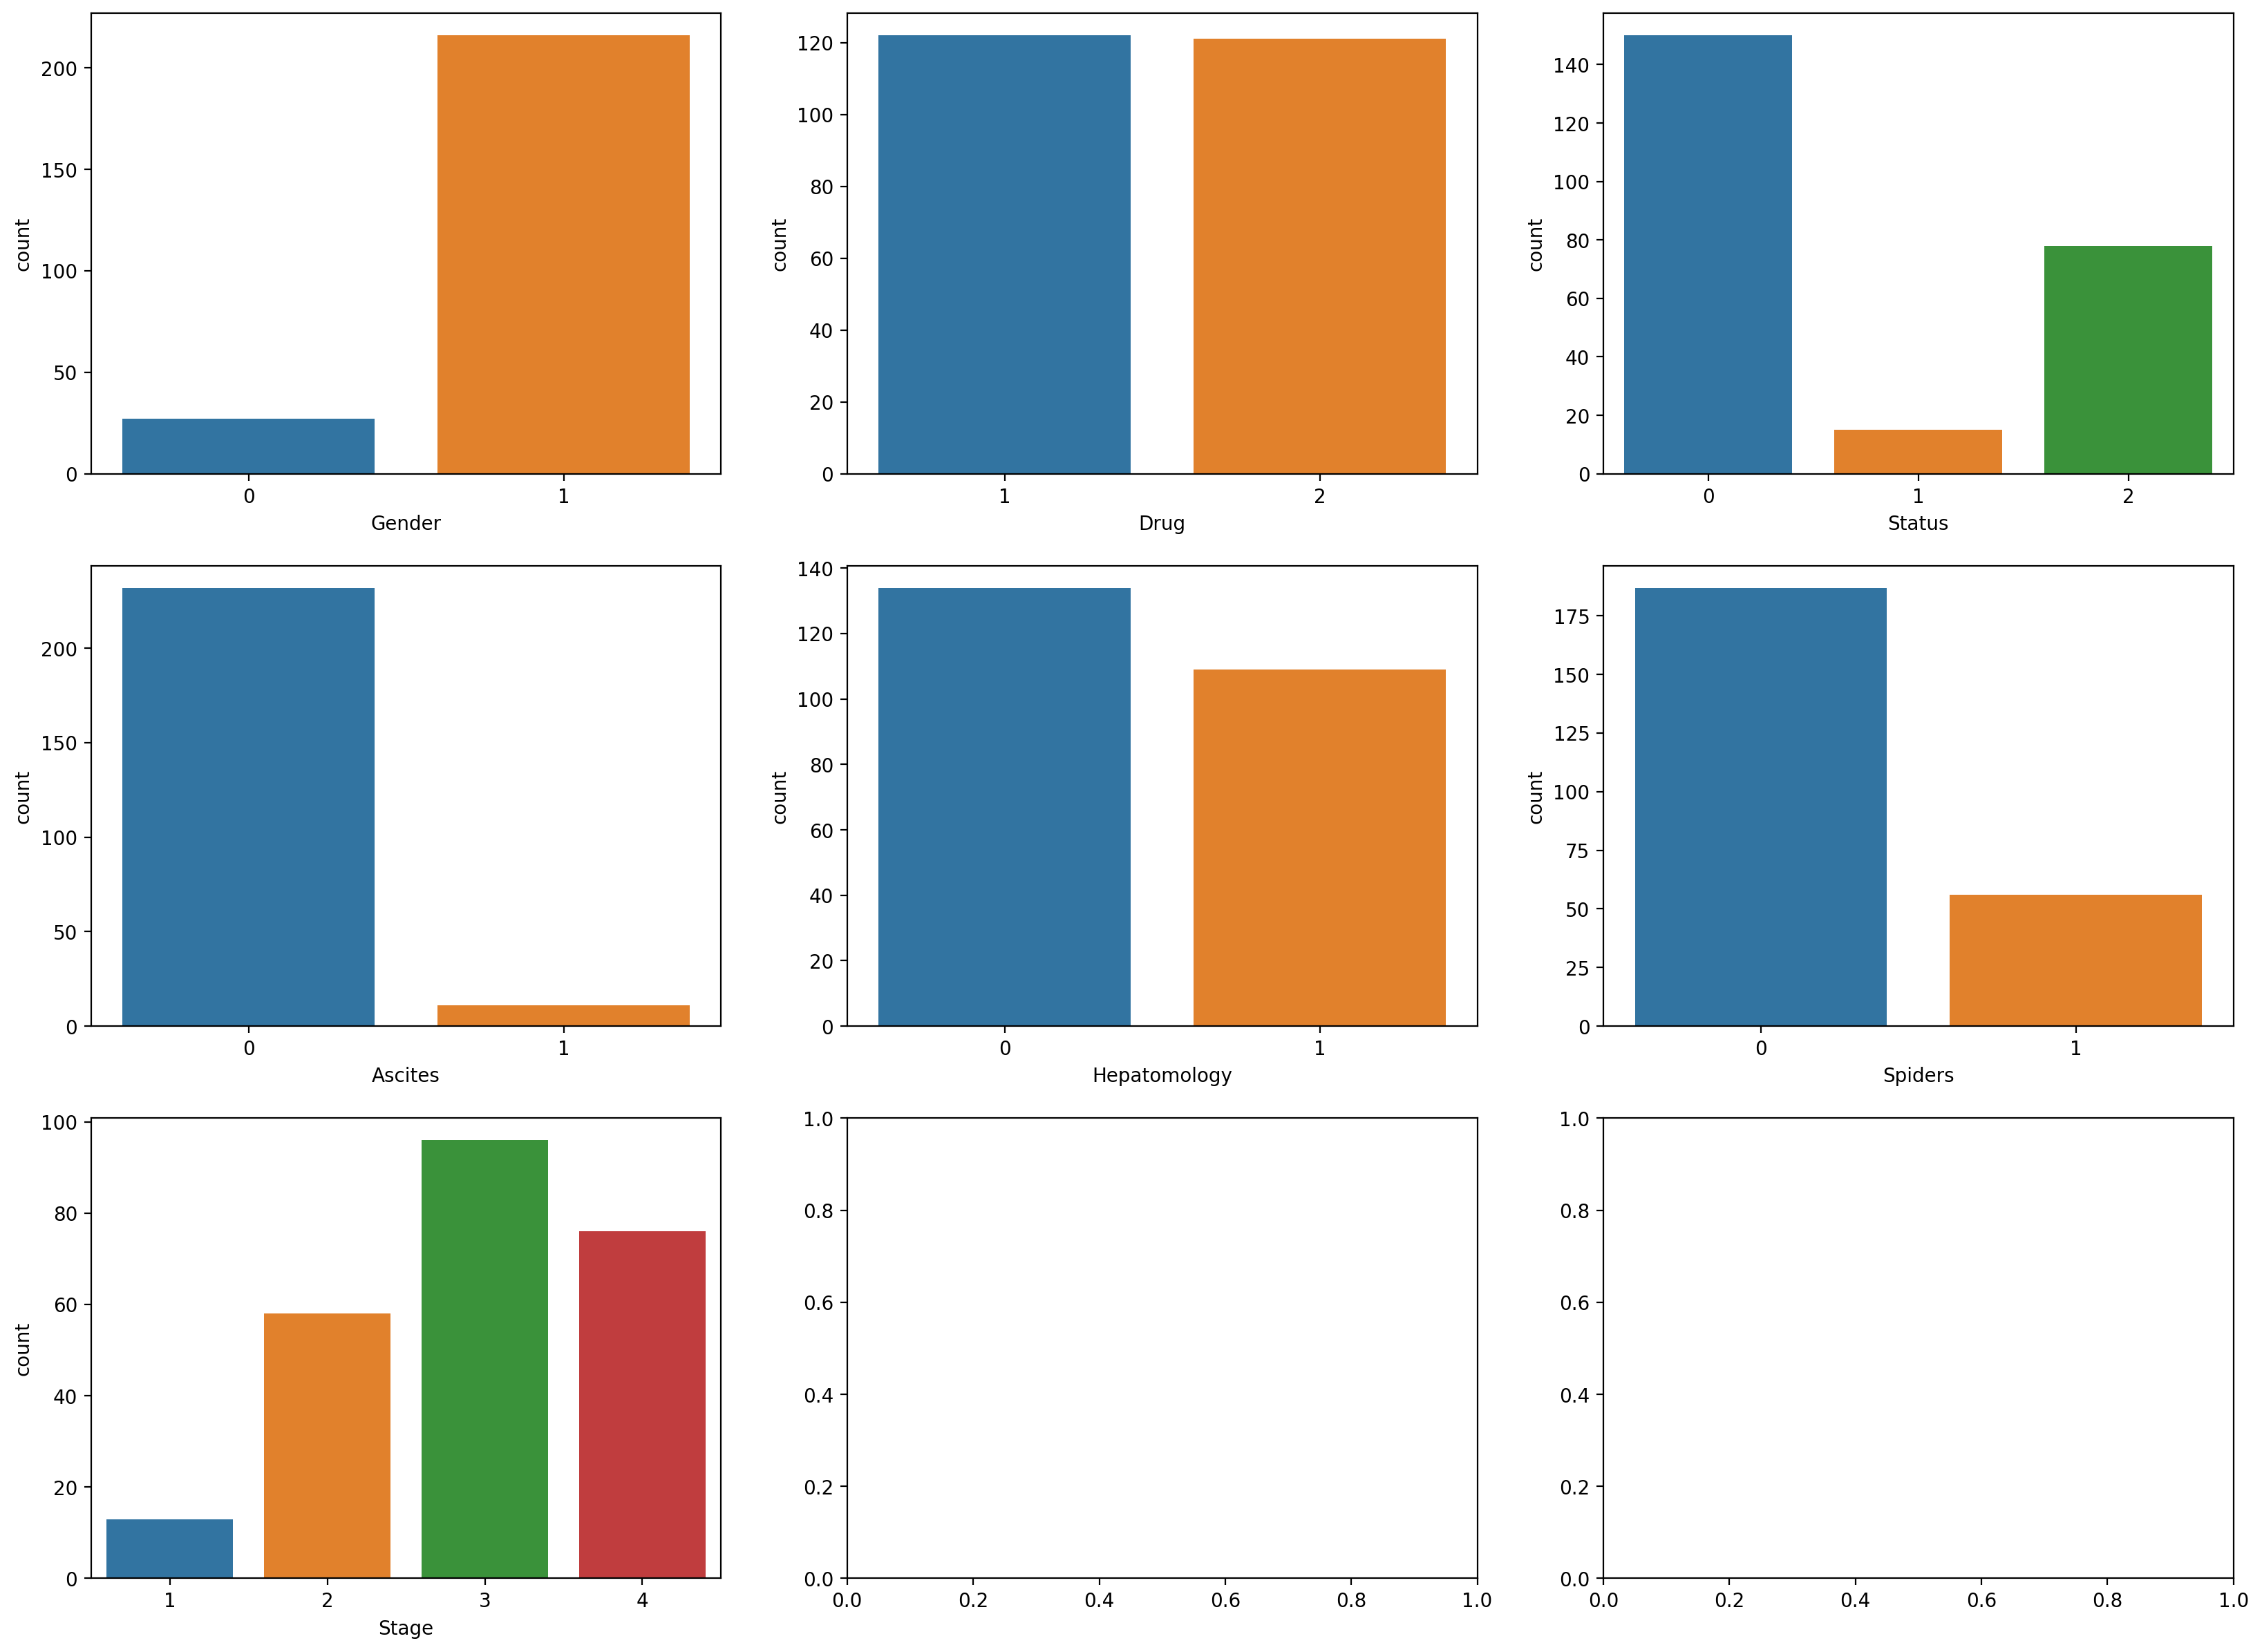

In [25]:
fig,axes=plt.subplots(3,3,figsize=(20,15), dpi=200)

sns.countplot(data['Gender'],ax=axes[0,0])
sns.countplot(data['Drug'],ax=axes[0,1])
sns.countplot(data['Status'],ax=axes[0,2])
sns.countplot(data['Ascites'],ax=axes[1,0])
sns.countplot(data['Hepatomology'],ax=axes[1,1])
sns.countplot(data['Spiders'],ax=axes[1,2])
sns.countplot(data['Stage'], ax=axes[2,0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

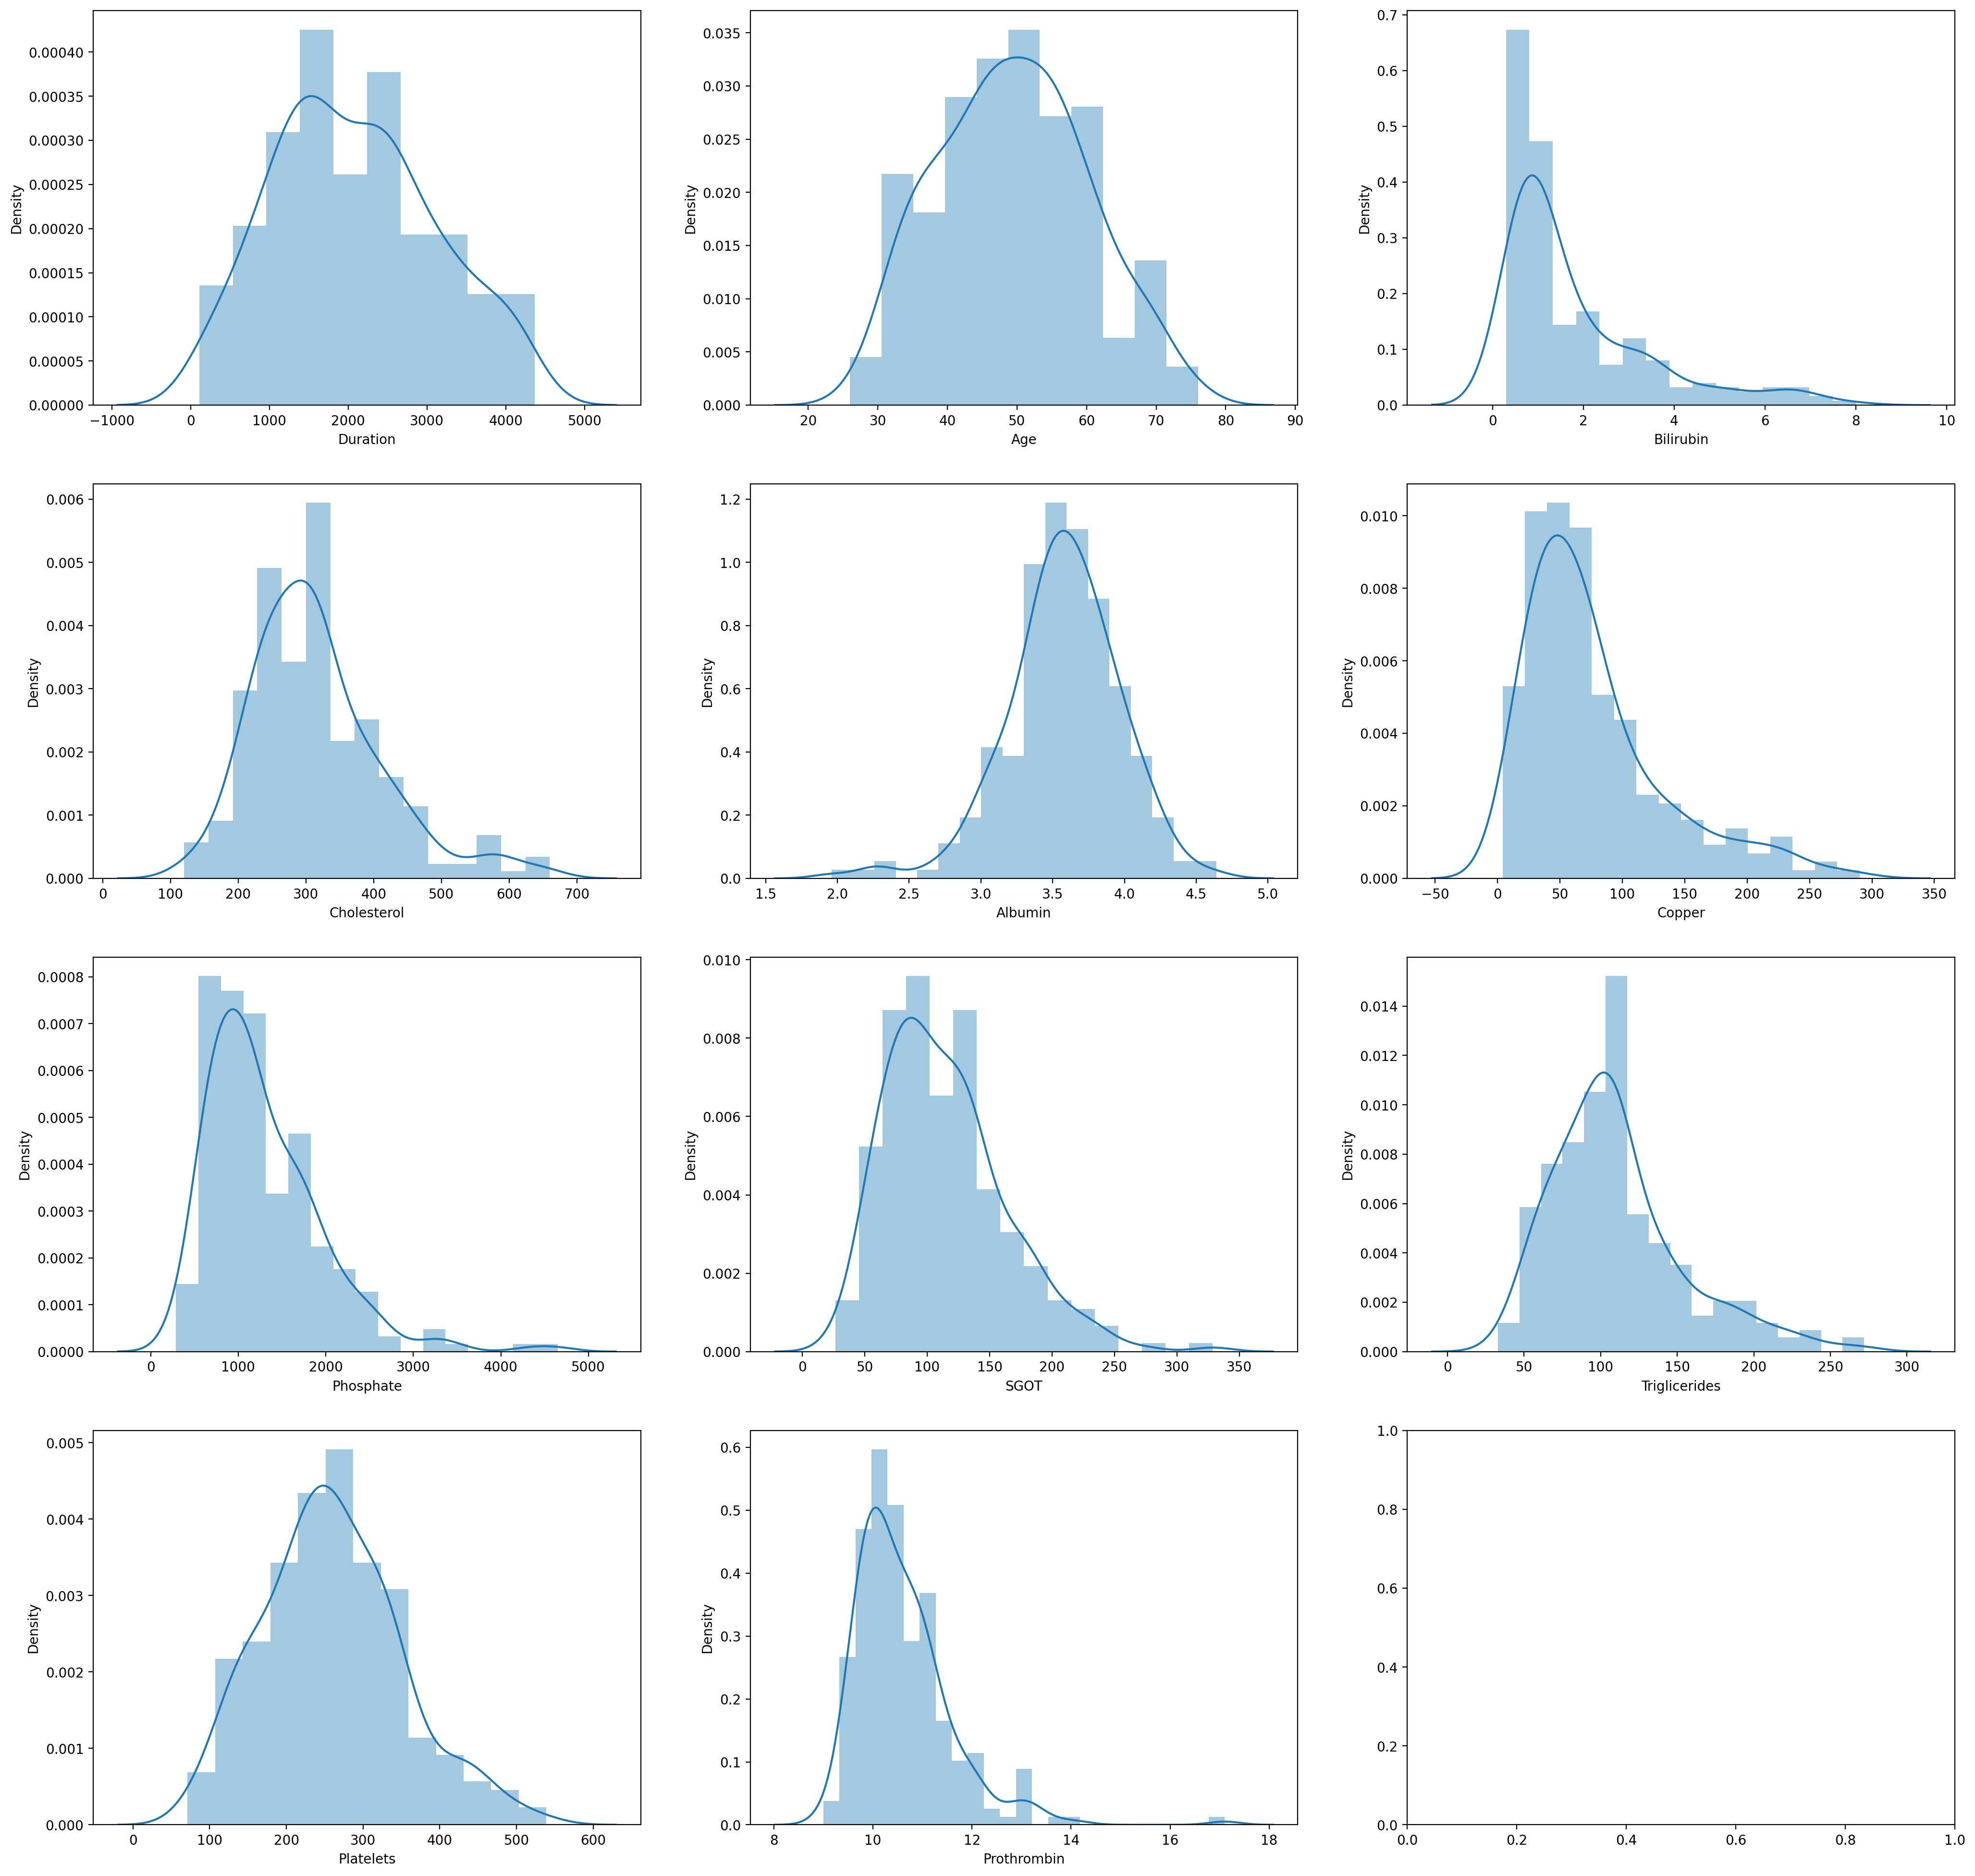

In [26]:
fig,axes=plt.subplots(4, 3,figsize=(25,25), dpi=200)

sns.distplot(data['Duration'],ax=axes[0,0])
sns.distplot(data['Age'],ax=axes[0,1])
sns.distplot(data['Bilirubin'],ax=axes[0,2])
sns.distplot(data['Cholesterol'],ax=axes[1,0])
sns.distplot(data['Albumin'],ax=axes[1,1])
sns.distplot(data['Copper'],ax=axes[1,2])
sns.distplot(data['Phosphate'],ax=axes[2,0])
sns.distplot(data['SGOT'],ax=axes[2,1])
sns.distplot(data['Triglicerides'],ax=axes[2,2])
sns.distplot(data['Platelets'],ax=axes[3,0])
sns.distplot(data['Prothrombin'],ax=axes[3,1])

Text(0.5, 1.0, 'Age VS Stage')

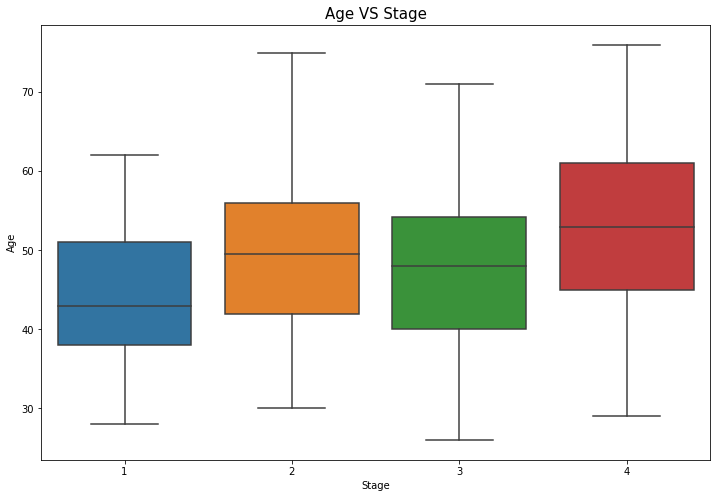

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['Stage'], y=data['Age'])
plt.title('Age VS Stage', fontsize=15)

Text(0.5, 1.0, 'Age VS Status')

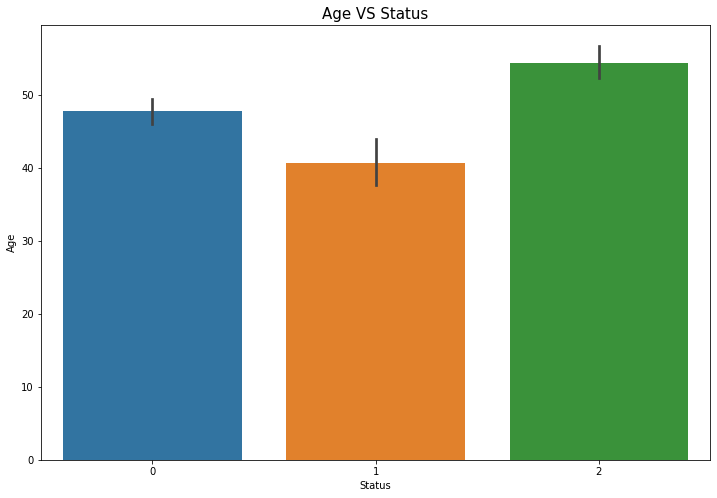

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['Status'], y=data['Age'])
plt.title('Age VS Status', fontsize=15)

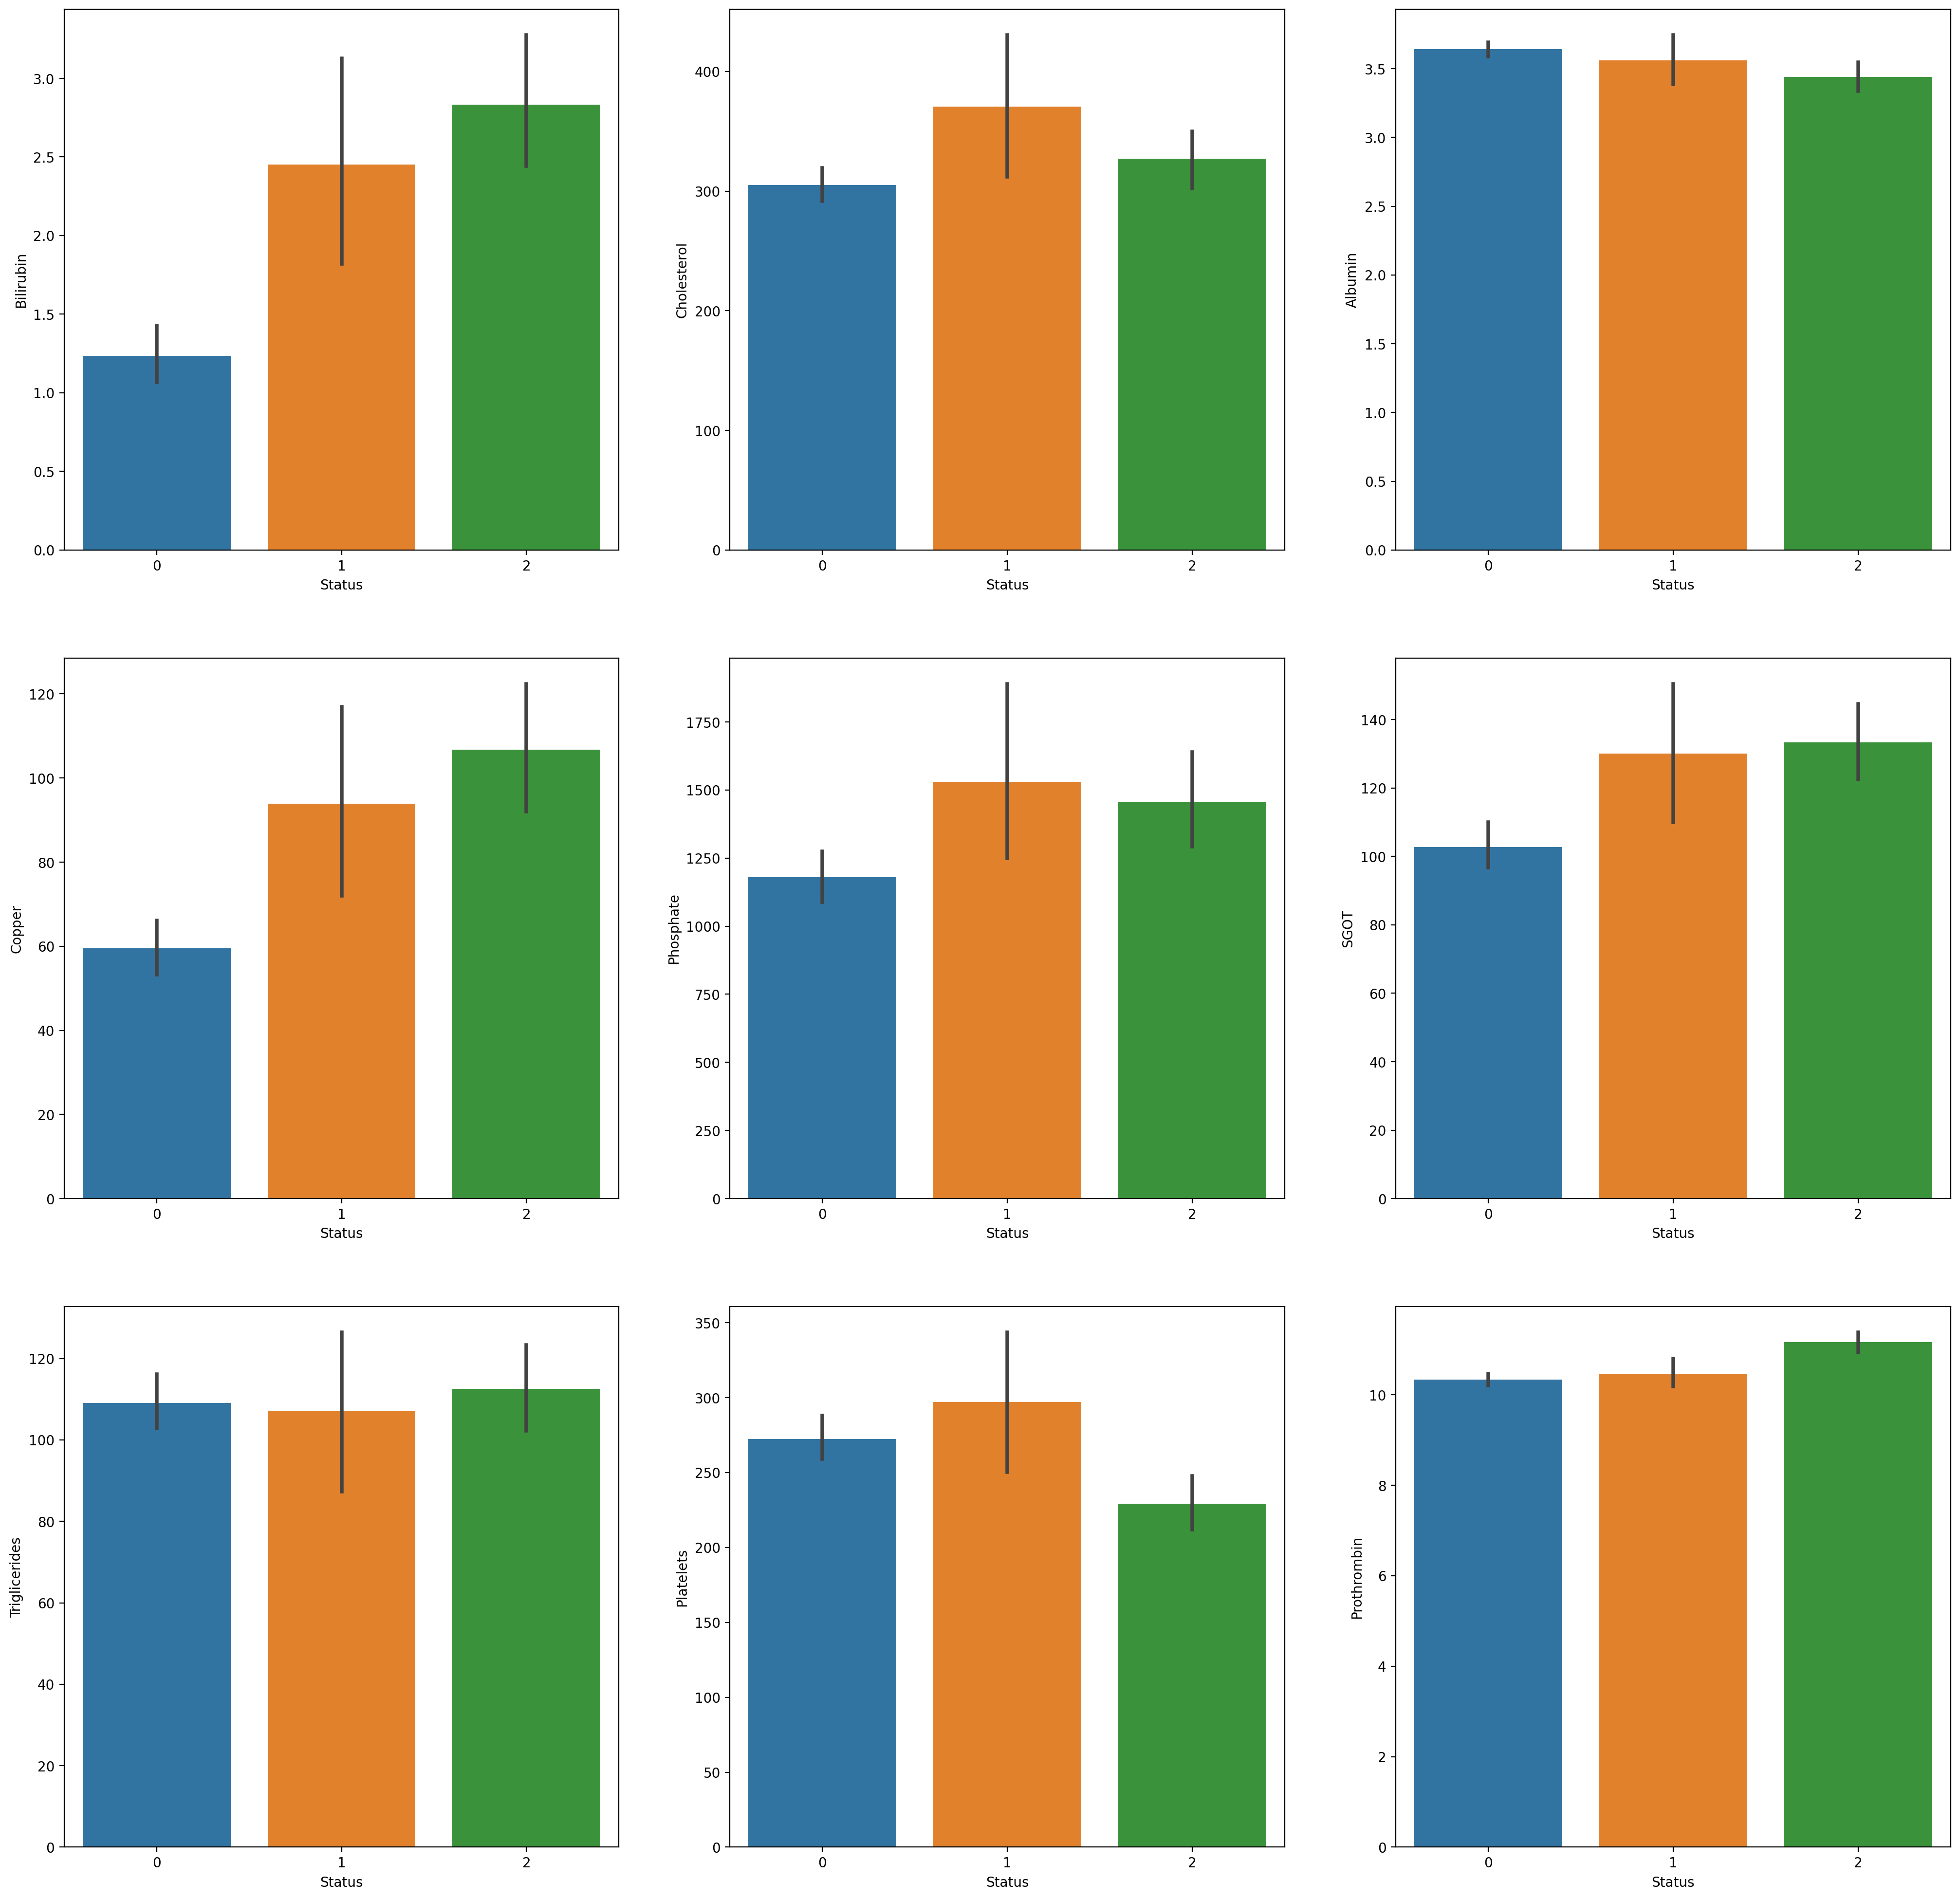

In [29]:
fig,axes=plt.subplots(3, 3,figsize=(25,25), dpi=200)

sns.barplot(x=data['Status'], y=data['Bilirubin'],ax=axes[0,0])
sns.barplot(x=data['Status'], y=data['Cholesterol'],ax=axes[0,1])
sns.barplot(x=data['Status'], y=data['Albumin'],ax=axes[0,2])
sns.barplot(x=data['Status'], y=data['Copper'],ax=axes[1,0])
sns.barplot(x=data['Status'], y=data['Phosphate'],ax=axes[1,1])
sns.barplot(x=data['Status'], y=data['SGOT'],ax=axes[1,2])
sns.barplot(x=data['Status'], y=data['Triglicerides'],ax=axes[2,0])
sns.barplot(x=data['Status'], y=data['Platelets'],ax=axes[2,1])
sns.barplot(x=data['Status'], y=data['Prothrombin'],ax=axes[2,2])

In [30]:
plt.figure()
plt.hist

<function matplotlib.pyplot.hist>

<Figure size 432x288 with 0 Axes>

## Creating the Model

In [31]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [32]:
data.Status.value_counts()

0    150
2     78
1     15
Name: Status, dtype: int64

In [33]:
data.columns

Index(['Duration', 'Status', 'Drug', 'Age', 'Gender', 'Ascites',
       'Hepatomology', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Phosphate', 'SGOT', 'Triglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [34]:
data

,Duration,Status,Drug,Age,Gender,Ascites,Hepatomology,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Phosphate,SGOT,Triglicerides,Platelets,Prothrombin,Stage
2,1012,2,1,70,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
4,1504,1,2,38,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
5,2503,2,2,66,1,0,1,0,0.0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,257.0,11.0,3
6,1832,0,2,55,1,0,1,0,0.0,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3
7,2466,2,2,53,1,0,0,0,0.0,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,0,1,61,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,0,2,58,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,0,1,62,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,0,1,38,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [35]:
y=data['Status']
set(y)

{0, 1, 2}

In [36]:
def Normalization(f):
  for l in f.columns:
    f[l] = (f[l] - f[l].min())/(f[l].max() - f[l].min())
  return f

In [37]:
data_with_id = data.reset_index()
train, test = split_train_test_by_id(data_with_id, 0.20, 'index')

In [38]:
y_label = train['Status'].to_numpy()
y_labelt = test['Status'].to_numpy()

In [39]:
y_labelt.shape

(49,)

In [40]:
y_label.shape, y_labelt.shape

((194,), (49,))

In [41]:
y_label

array([1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
train = train[['Age', 'Stage', 'SGOT', 'Copper', 'Edema', 'Ascites']]
test = test[['Age', 'Stage', 'SGOT', 'Copper', 'Edema', 'Ascites']]

In [43]:
train = Normalization(train)
test = Normalization(test)

In [44]:
train.head()

,Age,Stage,SGOT,Copper,Edema,Ascites
1,0.24,0.666667,0.394366,0.486014,0.0,0.0
3,0.58,0.666667,0.154930,0.167832,0.0,0.0
4,0.54,0.666667,0.009223,0.167832,0.0,0.0
5,0.32,0.333333,0.535211,0.262238,0.0,0.0
6,0.54,1.000000,0.239437,0.146853,0.0,0.0


In [45]:
X_train = train.to_numpy()
X_test = test.to_numpy()

In [46]:
X_train.shape, X_test.shape

((194, 6), (49, 6))

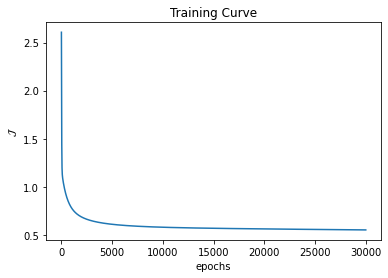

In [47]:
s_reg = Shallow_ANN()
s_reg.fit(X_train, y_label, neurons=20, eta=4e-3, epochs=3e4, show_curve=True)

In [48]:
y_hat = s_reg.predict(X_test)
accuracy(y_labelt, y_hat)

0.673469387755102

In [49]:
y_labelt

array([2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [50]:
y_hat

array([2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0])

Text(0.5, 24.0, 'Predicted label')

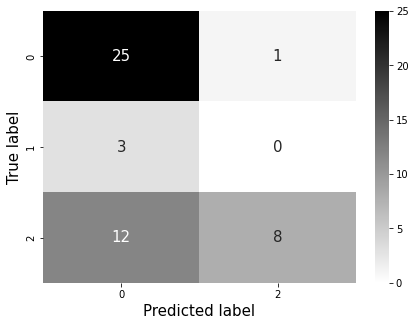

In [51]:
plt.figure(figsize=(7,5))
y_actu = pd.Series(y_labelt, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r", annot_kws={"size":15})
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label',fontsize=15)